In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import math

from keras.models import Sequential
from keras.layers import LSTM, Dropout, Dense

In [ ]:
# Load Data
start = '2010-01-01'
end = '2025-01-01'

df = yf.download('AAPL', start=start, end=end)
df = df.reset_index()

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


In [ ]:
df.head()

Price,Date,Close,High,Low,Open,Volume
Ticker,,AAPL,AAPL,AAPL,AAPL,AAPL
0,2010-01-04,6.431897,6.446623,6.382908,6.414465,493729600
1,2010-01-05,6.443017,6.479382,6.409055,6.449629,601904800
2,2010-01-06,6.340532,6.468563,6.333920,6.443017,552160000
3,2010-01-07,6.328811,6.371488,6.282828,6.363974,477131200
4,2010-01-08,6.370886,6.371488,6.283129,6.320395,447610800


In [ ]:
df.tail()

Price,Date,Close,High,Low,Open,Volume
Ticker,,AAPL,AAPL,AAPL,AAPL,AAPL
3769,2024-12-24,257.578674,257.588630,254.675658,254.875189,23234700
3770,2024-12-26,258.396667,259.474086,257.010028,257.568678,27237100
3771,2024-12-27,254.974930,258.077462,252.451019,257.209530,42355300
3772,2024-12-30,251.593079,252.889953,250.146571,251.623005,35557500
3773,2024-12-31,249.817368,252.670486,248.829744,251.832511,39480700


In [ ]:
features = ['Open', 'High', 'Low', 'Close', 'Volume']

In [ ]:
df  = df.reset_index()
df.head()

Price,index,Date,Close,High,Low,Open,Volume
Ticker,,,AAPL,AAPL,AAPL,AAPL,AAPL
0,0,2010-01-04,6.431897,6.446623,6.382908,6.414465,493729600
1,1,2010-01-05,6.443017,6.479382,6.409055,6.449629,601904800
2,2,2010-01-06,6.340532,6.468563,6.333920,6.443017,552160000
3,3,2010-01-07,6.328811,6.371488,6.282828,6.363974,477131200
4,4,2010-01-08,6.370886,6.371488,6.283129,6.320395,447610800


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3774 entries, 0 to 3773
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   (index, )       3774 non-null   int64         
 1   (Date, )        3774 non-null   datetime64[ns]
 2   (Close, AAPL)   3774 non-null   float64       
 3   (High, AAPL)    3774 non-null   float64       
 4   (Low, AAPL)     3774 non-null   float64       
 5   (Open, AAPL)    3774 non-null   float64       
 6   (Volume, AAPL)  3774 non-null   int64         
dtypes: datetime64[ns](1), float64(4), int64(2)
memory usage: 206.5 KB


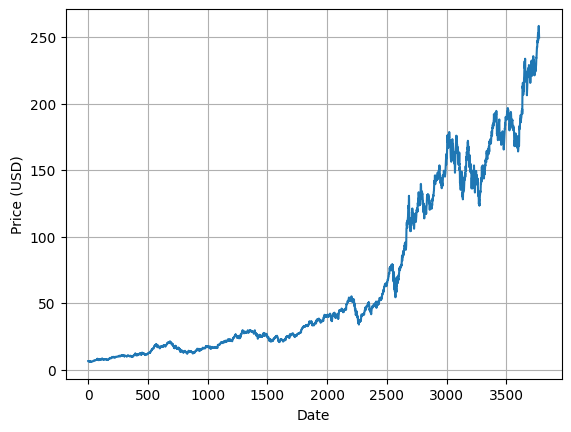

In [ ]:
# closing price of AAPL
plt.plot(df.Close)
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.grid(True)

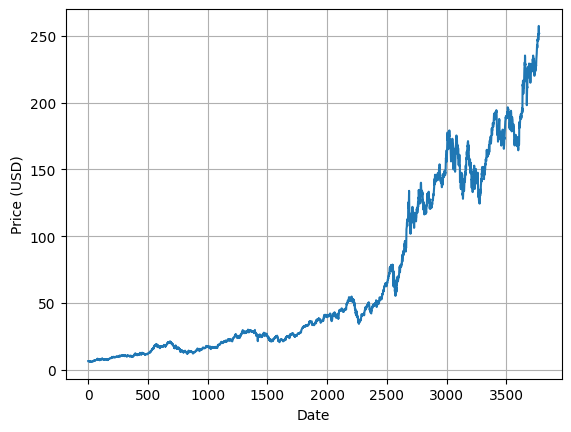

In [ ]:
plt.plot(df.Open)
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.grid(True)

Text(0, 0.5, 'Volume')

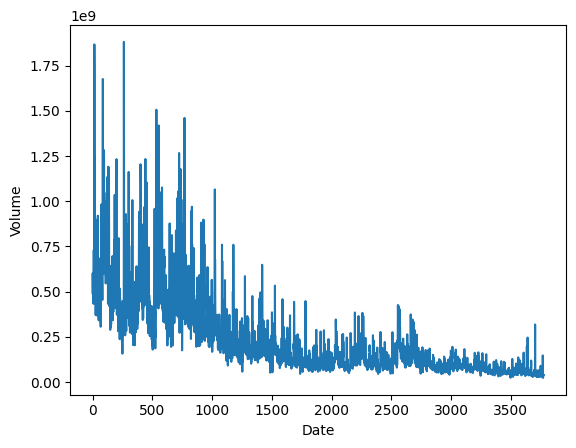

In [ ]:
plt.plot(df.Volume)
plt.xlabel('Date')
plt.ylabel('Volume')

In [ ]:

#represents the average closing price over the past 100 days.
# NAN mean there is no 100 days of data to average
mov_avg_100 = df.Close.rolling(100).mean()
mov_avg_100

Ticker,AAPL
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
3769,229.057162
3770,229.558170
3771,230.045265
3772,230.472763


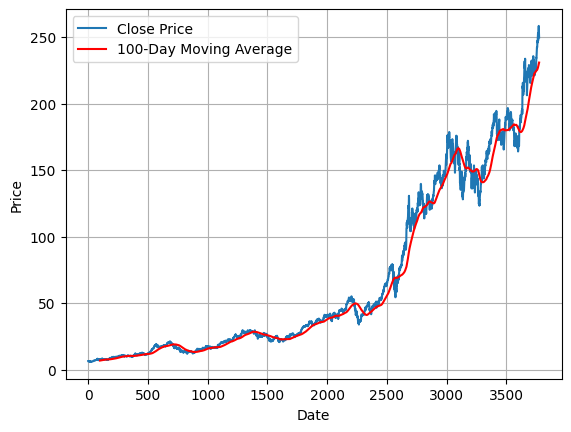

In [ ]:

plt.plot(df.Close, label='Close Price')
plt.plot(mov_avg_100, label='100-Day Moving Average', color='r')
plt.legend()
plt.xlabel('Date')
plt.ylabel('Price')
plt.grid(True)
plt.show()


In [ ]:
mov_avg_200 = df.Close.rolling(200).mean()
mov_avg_200

Ticker,AAPL
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
3769,210.905998
3770,211.337031
3771,211.761393
3772,212.159551


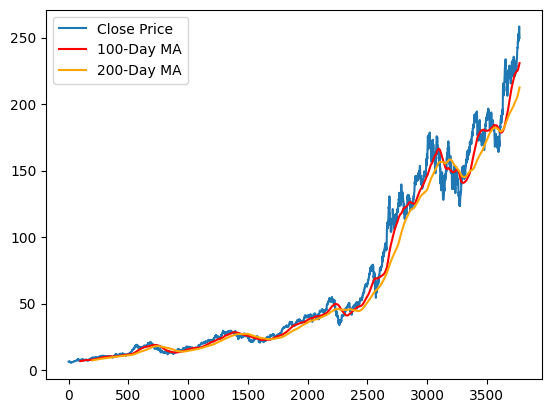

In [ ]:
plt.plot(df['Close'], label='Close Price')
plt.plot(mov_avg_100, label='100-Day MA',color='r')
plt.plot(mov_avg_200, label='200-Day MA',color='orange')
plt.legend()


In [ ]:
df.shape

(3774, 7)

In [ ]:
features = ['Open', 'High', 'Low', 'Close', 'Volume']
data_training = df[features][0:int(len(df)*0.70)]
data_testing = df[features][int(len(df)*0.70):]


In [ ]:
data_testing.head()

Price,Open,High,Low,Close,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
2641,88.730466,89.274822,88.436417,88.485016,110737200
2642,89.393906,90.030610,88.370805,88.485016,114041600
2643,89.916372,91.321011,89.884779,90.851990,118655600
2644,91.231129,92.011213,90.458336,90.570122,112424400
2645,91.549445,92.711067,91.461955,92.679474,117092000


In [ ]:
data_training.head()

Price,Open,High,Low,Close,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
0,6.414465,6.446623,6.382908,6.431897,493729600
1,6.449629,6.479382,6.409055,6.443017,601904800
2,6.443017,6.468563,6.333920,6.340532,552160000
3,6.363974,6.371488,6.282828,6.328811,477131200
4,6.320395,6.371488,6.283129,6.370886,447610800


In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
data_training_array = scaler.fit_transform(data_training)



In [ ]:
data_training_array

array([[0.00763318, 0.00657182, 0.00807945, 0.00792293, 0.24422195],
       [0.00805725, 0.00695902, 0.00839707, 0.00805642, 0.30315535],
       [0.00797751, 0.00683114, 0.00748435, 0.00682613, 0.27605459],
       ...,
       [0.99827106, 0.97972088, 0.97269309, 0.96236648, 0.08706317],
       [0.96556387, 0.97067284, 0.96755647, 0.98614273, 0.04641552],
       [0.98558078, 0.9816166 , 0.99329872, 0.99495295, 0.05163313]])

In [ ]:
data_training_array.shape

(2641, 5)

In [ ]:
x_train =[]
y_train =[]

for i in range(100,data_training_array.shape[0]):
  x_train.append(data_training_array[i-100:i])
  y_train.append(data_training_array[i,0])

x_train,y_train =np.array(x_train),np.array(y_train)

In [ ]:
x_train.shape

(2541, 100, 5)

In [ ]:
from keras.layers import Dense,Dropout,LSTM
from keras.models import Sequential

In [ ]:
model = Sequential()
model.add(LSTM(units=50, activation='relu', return_sequences=True, input_shape=(x_train.shape[1], x_train.shape[2])))
model.add(Dropout(0.2))

model.add(LSTM(units=60, activation='relu', return_sequences=True))
model.add(Dropout(0.3))

model.add(LSTM(units=80, activation='relu', return_sequences=True))
model.add(Dropout(0.3))

model.add(LSTM(units=120, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=1))


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 100, 50)        │        11,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 100, 50)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 100, 60)        │        26,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 100, 60)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 100, 80)        │        45,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 100, 80)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 120)            │        96,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 120)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │           121 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 179,561 (701.41 KB)

 Trainable params: 179,561 (701.41 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(optimizer='adam',loss='mean_squared_error')
model.fit(x_train,y_train,epochs=50)

Epoch 1/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 31s 280ms/step - loss: 0.0375
Epoch 2/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 24s 302ms/step - loss: 0.0040
Epoch 3/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 24s 296ms/step - loss: 0.0033
Epoch 4/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 40s 287ms/step - loss: 0.0038
Epoch 5/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 41s 292ms/step - loss: 0.0033
Epoch 6/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 41s 296ms/step - loss: 0.0032
Epoch 7/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 41s 298ms/step - loss: 0.0030
Epoch 8/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 24s 299ms/step - loss: 0.0029
Epoch 9/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 25s 317ms/step - loss: 0.0027
Epoch 10/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 24s 296ms/step - loss: 0.0024
Epoch 11/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 42s 304ms/step - loss: 0.0020
Epoch 12/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 41s 302ms/step - loss: 0.0025
Epoch 13/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 40s 286ms/step - loss: 0.0026
Epoch 14/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 42s 298ms/step - loss: 0.0021
Epoch 15/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 41s 

In [ ]:
model.save('keras_model.h5')


In [ ]:
data_testing.head()


Price,Open,High,Low,Close,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
2641,88.730466,89.274822,88.436417,88.485016,110737200
2642,89.393906,90.030610,88.370805,88.485016,114041600
2643,89.916372,91.321011,89.884779,90.851990,118655600
2644,91.231129,92.011213,90.458336,90.570122,112424400
2645,91.549445,92.711067,91.461955,92.679474,117092000


In [ ]:
data_testing.tail()


Price,Open,High,Low,Close,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
3769,254.875189,257.588630,254.675658,257.578674,23234700
3770,257.568678,259.474086,257.010028,258.396667,27237100
3771,257.209530,258.077462,252.451019,254.974930,42355300
3772,251.623005,252.889953,250.146571,251.593079,35557500
3773,251.832511,252.670486,248.829744,249.817368,39480700


In [ ]:
past_100_days = data_training.tail(100).copy()

In [ ]:
# Instead of using append, use concat to combine the DataFrames:
final_df = pd.concat([past_100_days, data_testing], ignore_index=True)

In [ ]:
final_df.head()


Price,Open,High,Low,Close,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
0,78.129960,78.379592,77.070843,77.562836,117684000
1,76.145043,77.931244,76.065067,77.931244,109348800
2,78.428086,78.500791,77.242936,77.461060,94323200
3,77.911851,79.305427,77.911851,79.300583,113730400
4,78.571097,79.063090,78.367514,78.735901,94747600


In [ ]:
input_data = scaler.transform(final_df)
input_data

array([[ 8.72511321e-01,  8.56801578e-01,  8.66775830e-01,
         8.61823327e-01,  3.93538721e-02],
       [ 8.48573520e-01,  8.51502221e-01,  8.54557958e-01,
         8.66245930e-01,  3.48128899e-02],
       [ 8.76106675e-01,  8.58234128e-01,  8.68866366e-01,
         8.60601543e-01,  2.66270055e-02],
       ...,
       [ 3.03218414e+00,  2.98078562e+00,  2.99724297e+00,
         2.99158937e+00, -1.68489009e-03],
       [ 2.96481150e+00,  2.91947057e+00,  2.96924921e+00,
         2.95099150e+00, -5.38830323e-03],
       [ 2.96733810e+00,  2.91687652e+00,  2.95325278e+00,
         2.92967476e+00, -3.25096020e-03]])

In [ ]:
input_data.shape

(1233, 5)

In [ ]:
x_test = []
y_test = []

for i in range(100,input_data.shape[0]):
  x_test.append(input_data[i-100: i])
  y_test.append(input_data[i, features.index('Close')]) # Use index 3 for 'Close' price

In [ ]:
x_test, y_test = np.array(x_test), np.array(y_test)
print(x_test.shape)
print(y_test.shape)

(1133, 100, 5)
(1133,)


In [ ]:
y_predicted = model.predict(x_test)

36/36 ━━━━━━━━━━━━━━━━━━━━ 5s 128ms/step


In [ ]:
y_predicted.shape

(1133, 1)

In [ ]:
y_test

array([0.99294003, 0.99294003, 1.02135467, ..., 2.99158937, 2.9509915 ,
       2.92967476])

In [ ]:
y_predicted

array([[ 0.9097224 ],
       [ 0.91255456],
       [ 0.91596204],
       ...,
       [ 6.0745797 ],
       [-1.1912065 ],
       [ 6.837626  ]], dtype=float32)

In [ ]:
scaler.scale_

array([1.20598504e-02, 1.18197508e-02, 1.21477078e-02, 1.20046271e-02,
       5.44795838e-10])

In [ ]:
scaler_factor = 1/0.02099517
y_predicted = y_predicted * scaler_factor
y_test = y_test * scaler_factor

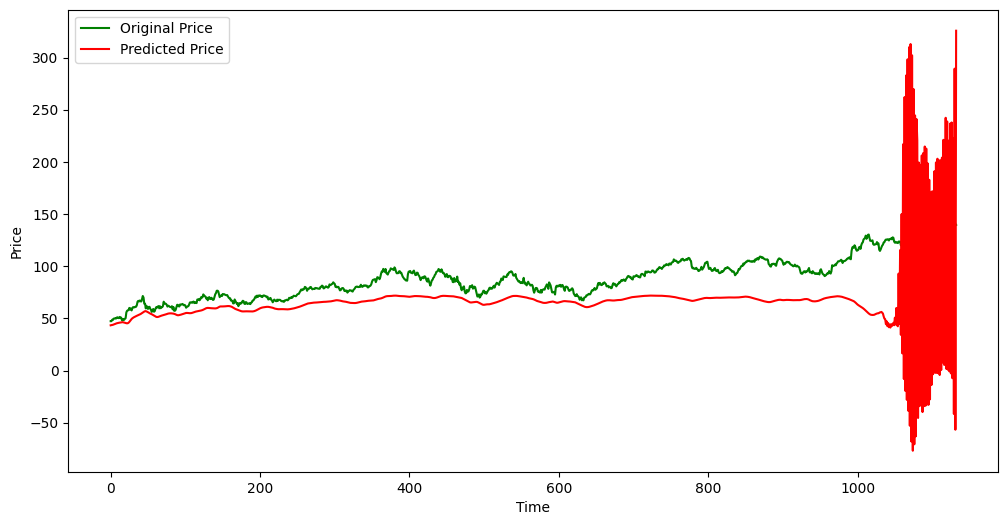

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(y_test, 'g', label = 'Original Price')
plt.plot(y_predicted, 'r', label = 'Predicted Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

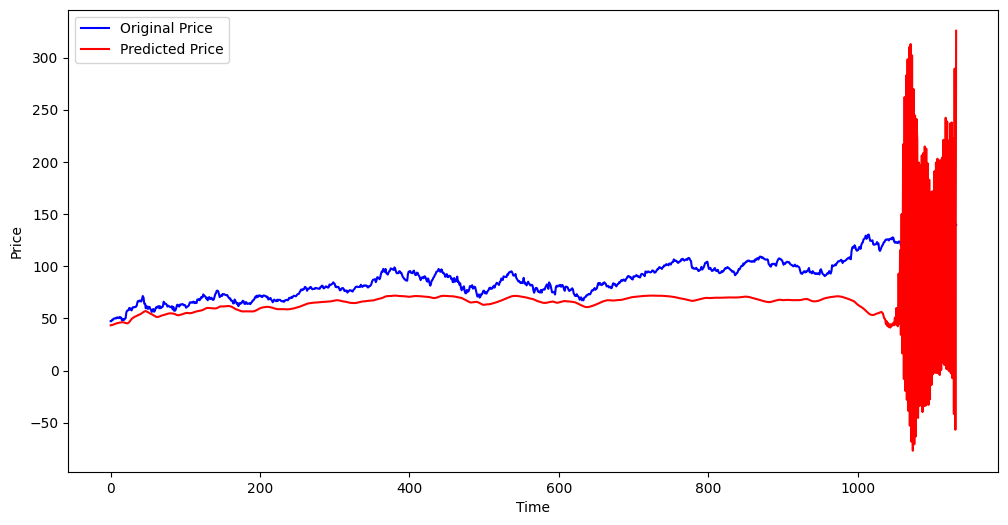

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(y_test, 'b', label = 'Original Price')
plt.plot(y_predicted, 'r', label = 'Predicted Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

In [ ]:
from keras.models import Sequential
from keras.layers import Dropout

In [ ]:
# Reshape x_train to fit CNN input (samples, time steps, features)
x_train_cnn = x_train.reshape((x_train.shape[0], x_train.shape[1], x_train.shape[2]))

In [ ]:
# Building CNN model
cnn_model = Sequential()

from keras.layers import Conv1D, MaxPooling1D, Flatten

cnn_model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(x_train_cnn.shape[1], x_train_cnn.shape[2])))
cnn_model.add(MaxPooling1D(pool_size=2))
cnn_model.add(Dropout(0.2))

cnn_model.add(Conv1D(filters=128, kernel_size=3, activation='relu'))
cnn_model.add(MaxPooling1D(pool_size=2))
cnn_model.add(Dropout(0.3))

cnn_model.add(Flatten())
cnn_model.add(Dense(units=100, activation='relu'))
cnn_model.add(Dropout(0.4))
cnn_model.add(Dense(units=1))

cnn_model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
cnn_model.fit(x_train_cnn, y_train, epochs=50)

Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


80/80 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0246
Epoch 2/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0051
Epoch 3/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - loss: 0.0044
Epoch 4/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0044
Epoch 5/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0033
Epoch 6/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0031
Epoch 7/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0027
Epoch 8/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0027
Epoch 9/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0026
Epoch 10/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 0.0023
Epoch 11/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 0.0024
Epoch 12/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0022
Epoch 13/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - loss: 0.0020
Epoch 14/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - loss: 0.0018
Epoch 15/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - loss: 0.0022
Epoch 16/50
80/

In [ ]:
y_predicted_cnn = cnn_model.predict(x_test)

36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step


In [ ]:
# Reshape y_predicted_cnn to be 2D before inverse transform
y_predicted_cnn_reshaped = y_predicted_cnn.reshape(-1, 1)

# Create a dummy array with the same number of features as the scaler was fitted on (5)
# Place the predicted 'Close' price into the 'Close' column (index 3)
dummy_array_cnn = np.zeros((y_predicted_cnn_reshaped.shape[0], scaler.n_features_in_))
dummy_array_cnn[:, features.index('Close')] = y_predicted_cnn_reshaped[:, 0]

# Inverse transform the predicted 'Close' prices
y_predicted_cnn = scaler.inverse_transform(dummy_array_cnn)[:, features.index('Close')]

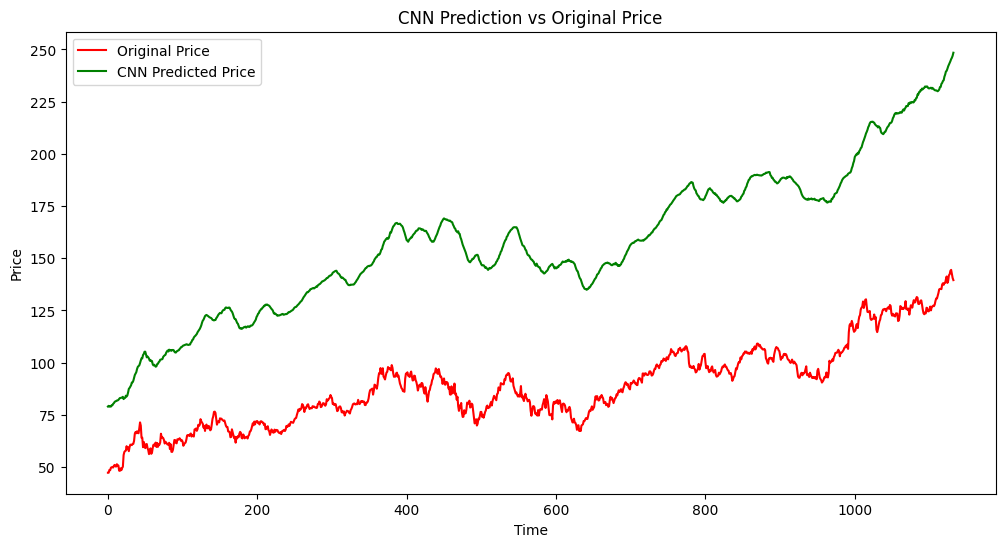

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(y_test, 'r', label='Original Price')
plt.plot(y_predicted_cnn, 'g', label='CNN Predicted Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.title('CNN Prediction vs Original Price')
plt.show()

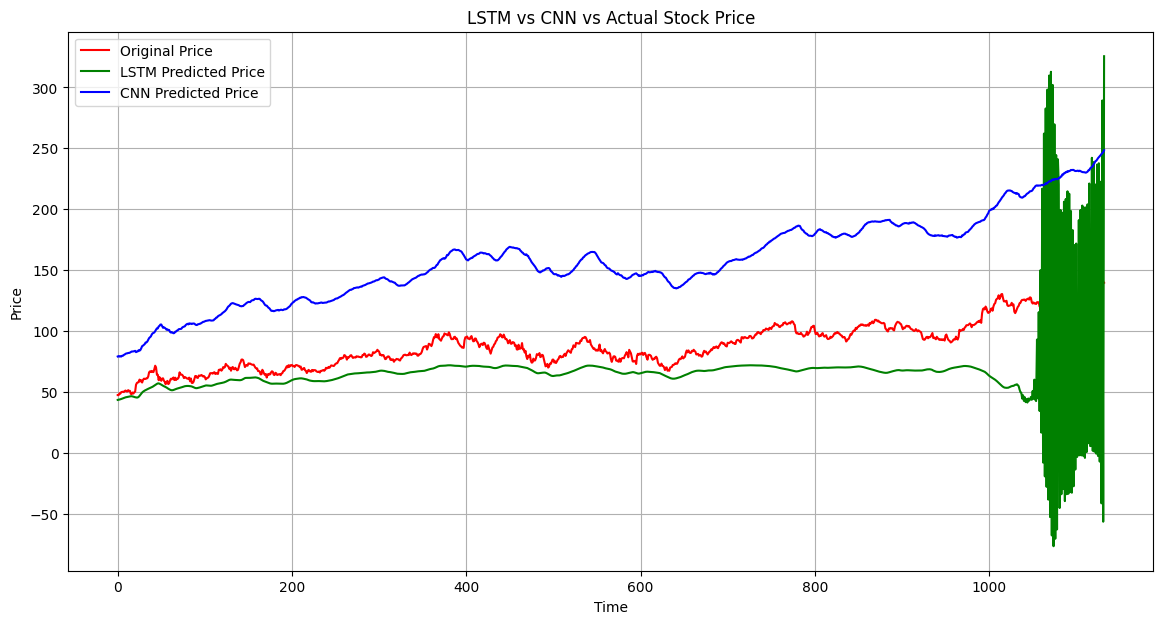

In [ ]:
plt.figure(figsize=(14,7))
plt.plot(y_test, 'r', label='Original Price')
plt.plot(y_predicted, 'g', label='LSTM Predicted Price')
plt.plot(y_predicted_cnn, 'b', label='CNN Predicted Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.title('LSTM vs CNN vs Actual Stock Price')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import math

rmse = math.sqrt(mean_squared_error(y_test, y_predicted))
mae = mean_absolute_error(y_test, y_predicted)
r2 = r2_score(y_test, y_predicted)

print(f"RMSE: {rmse}")
print(f"MAE: {mae}")
print(f"R² Score: {r2}")


RMSE: 42.56976692277703
MAE: 28.168061076685504
R² Score: -3.647192028336316


In [ ]:
rmse_cnn = math.sqrt(mean_squared_error(y_test, y_predicted_cnn))
mae_cnn = mean_absolute_error(y_test, y_predicted_cnn)

print(f"CNN RMSE: {rmse_cnn}")
print(f"CNN MAE: {mae_cnn}")

CNN RMSE: 70.97536785859846
CNN MAE: 68.91888890357843


In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math

# Calculate RMSE and MAE for LSTM
rmse_lstm = math.sqrt(mean_squared_error(y_test, y_predicted))
mae_lstm = mean_absolute_error(y_test, y_predicted)

# Scores
models = ['LSTM', 'CNN']
rmse_scores = [rmse_lstm, rmse_cnn]
mae_scores = [mae_lstm, mae_cnn]

x = np.arange(len(models))
width = 0.35

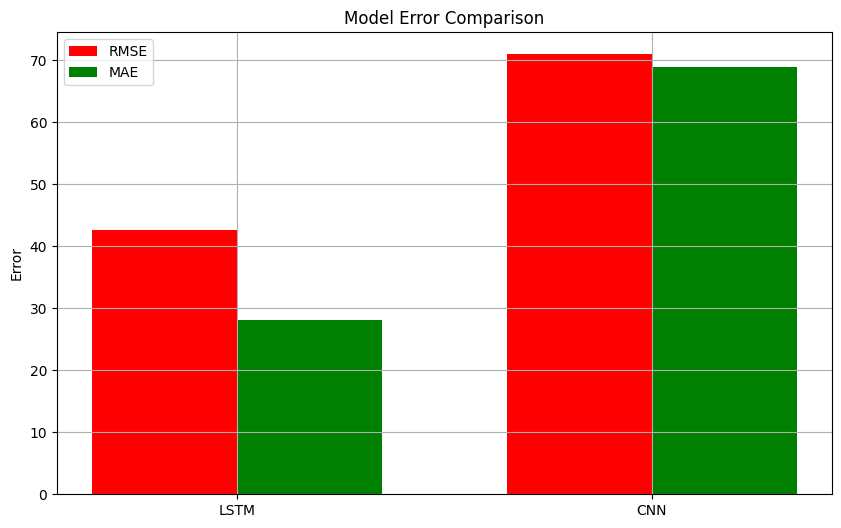

In [ ]:
plt.figure(figsize=(10,6))
plt.bar(x - width/2, rmse_scores, width, label='RMSE', color='r')
plt.bar(x + width/2, mae_scores, width, label='MAE', color='g')

plt.ylabel('Error')
plt.title('Model Error Comparison')
plt.xticks(x, models)
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
from sklearn.metrics import r2_score

r2_lstm = r2_score(y_test, y_predicted)
r2_cnn = r2_score(y_test, y_predicted_cnn)

print(f"LSTM R² Score: {r2_lstm * 100:.2f}%")
print(f"CNN R² Score: {r2_cnn * 100:.2f}%")
print("\n")

def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

mape_lstm = mean_absolute_percentage_error(y_test, y_predicted)
mape_cnn = mean_absolute_percentage_error(y_test, y_predicted_cnn)

print(f"LSTM MAPE: {mape_lstm:.2f}%")
print(f"CNN MAPE: {mape_cnn:.2f}%")

LSTM R² Score: -364.72%
CNN R² Score: -1191.82%


LSTM MAPE: 34.54%
CNN MAPE: 77.85%


In [ ]:
print(f"LSTM Accuracy ≈ {100 - mape_lstm:.2f}%")
print(f"CNN Accuracy ≈ {100 - mape_cnn:.2f}%")

LSTM Accuracy ≈ 65.46%
CNN Accuracy ≈ 22.15%


In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
import math

# RMSE
rmse_lstm = math.sqrt(mean_squared_error(y_test, y_predicted))
rmse_cnn = math.sqrt(mean_squared_error(y_test, y_predicted_cnn))

# MAE
mae_lstm = mean_absolute_error(y_test, y_predicted)
mae_cnn = mean_absolute_error(y_test, y_predicted_cnn)

# R² Score (like accuracy for regression)
r2_lstm = r2_score(y_test, y_predicted)
r2_cnn = r2_score(y_test, y_predicted_cnn)

# MAPE
def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

mape_lstm = mean_absolute_percentage_error(y_test, y_predicted)
mape_cnn = mean_absolute_percentage_error(y_test, y_predicted_cnn)

# Accuracy approximation (100 - MAPE)
acc_lstm = 100 - mape_lstm
acc_cnn = 100 - mape_cnn

# Print all results
print(f" LSTM Model:")
print(f"  RMSE: {rmse_lstm:.2f}")
print(f"  MAE: {mae_lstm:.2f}")
print(f"  R² Score: {r2_lstm * 100:.2f}%")
print(f"  Accuracy (approx): {acc_lstm:.2f}%")
print()
print(f" CNN Model:")
print(f"  RMSE: {rmse_cnn:.2f}")
print(f"  MAE: {mae_cnn:.2f}")
print(f"  R² Score: {r2_cnn * 100:.2f}%")
print(f"  Accuracy (approx): {acc_cnn:.2f}%")

 LSTM Model:
  RMSE: 42.57
  MAE: 28.17
  R² Score: -364.72%
  Accuracy (approx): 65.46%

 CNN Model:
  RMSE: 70.98
  MAE: 68.92
  R² Score: -1191.82%
  Accuracy (approx): 22.15%


In [ ]:
# Reshape data to 2D (samples, features)
x_train_ml = x_train.reshape(x_train.shape[0], x_train.shape[1] * x_train.shape[2])
x_test_ml = x_test.reshape(x_test.shape[0], x_test.shape[1] * x_test.shape[2])

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR

In [ ]:
# Initialize models
lr_model = LinearRegression()

In [ ]:
dt_model = DecisionTreeRegressor()

In [ ]:
svm_model = SVR()


In [ ]:
# Train models
lr_model.fit(x_train_ml, y_train)

LinearRegression()

In [ ]:
dt_model.fit(x_train_ml, y_train)

DecisionTreeRegressor()

In [ ]:
svm_model.fit(x_train_ml, y_train)

SVR()

In [ ]:
y_pred_lr = lr_model.predict(x_test_ml)
y_pred_dt = dt_model.predict(x_test_ml)
y_pred_svm = svm_model.predict(x_test_ml)

In [ ]:
# Rescale predictions
y_pred_lr = y_pred_lr * scaler_factor
y_pred_dt = y_pred_dt * scaler_factor
y_pred_svm = y_pred_svm * scaler_factor

In [ ]:
def evaluate_model(name, y_true, y_pred):
    rmse = math.sqrt(mean_squared_error(y_true, y_pred))
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    mape = mean_absolute_percentage_error(y_true, y_pred)
    accuracy = 100 - mape

    print(f"📊 {name} Model:")
    print(f"  RMSE: {rmse:.2f}")
    print(f"  MAE: {mae:.2f}")
    print(f"  R² Score: {r2 * 100:.2f}%")
    print(f"  Accuracy (approx): {accuracy:.2f}%\n")

# Run evaluations
evaluate_model("Linear Regression", y_test, y_pred_lr)
evaluate_model("Decision Tree", y_test, y_pred_dt)
evaluate_model("SVM", y_test, y_pred_svm)

📊 Linear Regression Model:
  RMSE: 1.84
  MAE: 1.42
  R² Score: 99.13%
  Accuracy (approx): 98.33%

📊 Decision Tree Model:
  RMSE: 45.99
  MAE: 41.54
  R² Score: -442.39%
  Accuracy (approx): 55.78%

📊 SVM Model:
  RMSE: 70.21
  MAE: 67.05
  R² Score: -1164.22%
  Accuracy (approx): 25.89%



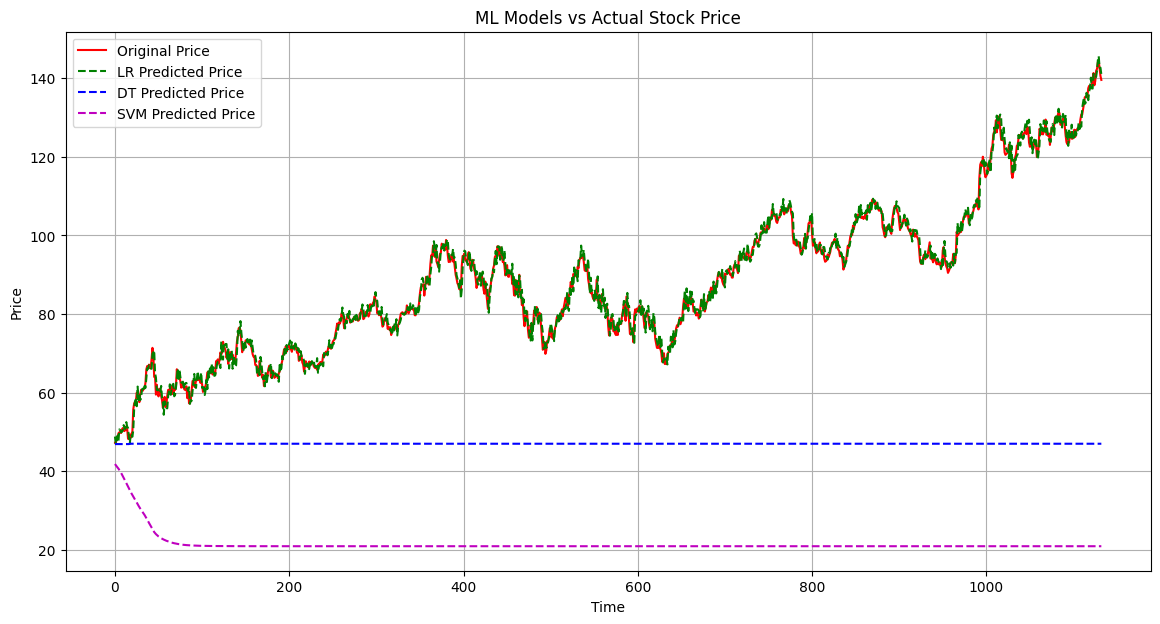

In [ ]:
plt.figure(figsize=(14,7))
plt.plot(y_test, 'r', label='Original Price')
plt.plot(y_pred_lr, 'g--', label='LR Predicted Price')
plt.plot(y_pred_dt, 'b--', label='DT Predicted Price')
plt.plot(y_pred_svm, 'm--', label='SVM Predicted Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.title('ML Models vs Actual Stock Price')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
model_names = ['LSTM', 'CNN', 'Linear Regression', 'Decision Tree', 'SVM']
rmse_values = []
mae_values = []
r2_scores = []
accuracy_scores = []

# Helper to evaluate and store metrics
def store_metrics(y_true, y_pred, label):
    rmse = math.sqrt(mean_squared_error(y_true, y_pred))
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    mape = mean_absolute_percentage_error(y_true, y_pred)
    accuracy = 100 - mape

    rmse_values.append(rmse)
    mae_values.append(mae)
    r2_scores.append(r2 * 100)
    accuracy_scores.append(accuracy)

# Store metrics for all models
store_metrics(y_test, y_predicted, "LSTM")
store_metrics(y_test, y_predicted_cnn, "CNN")
store_metrics(y_test, y_pred_lr, "Linear Regression")
store_metrics(y_test, y_pred_dt, "Decision Tree")
store_metrics(y_test, y_pred_svm, "SVM")

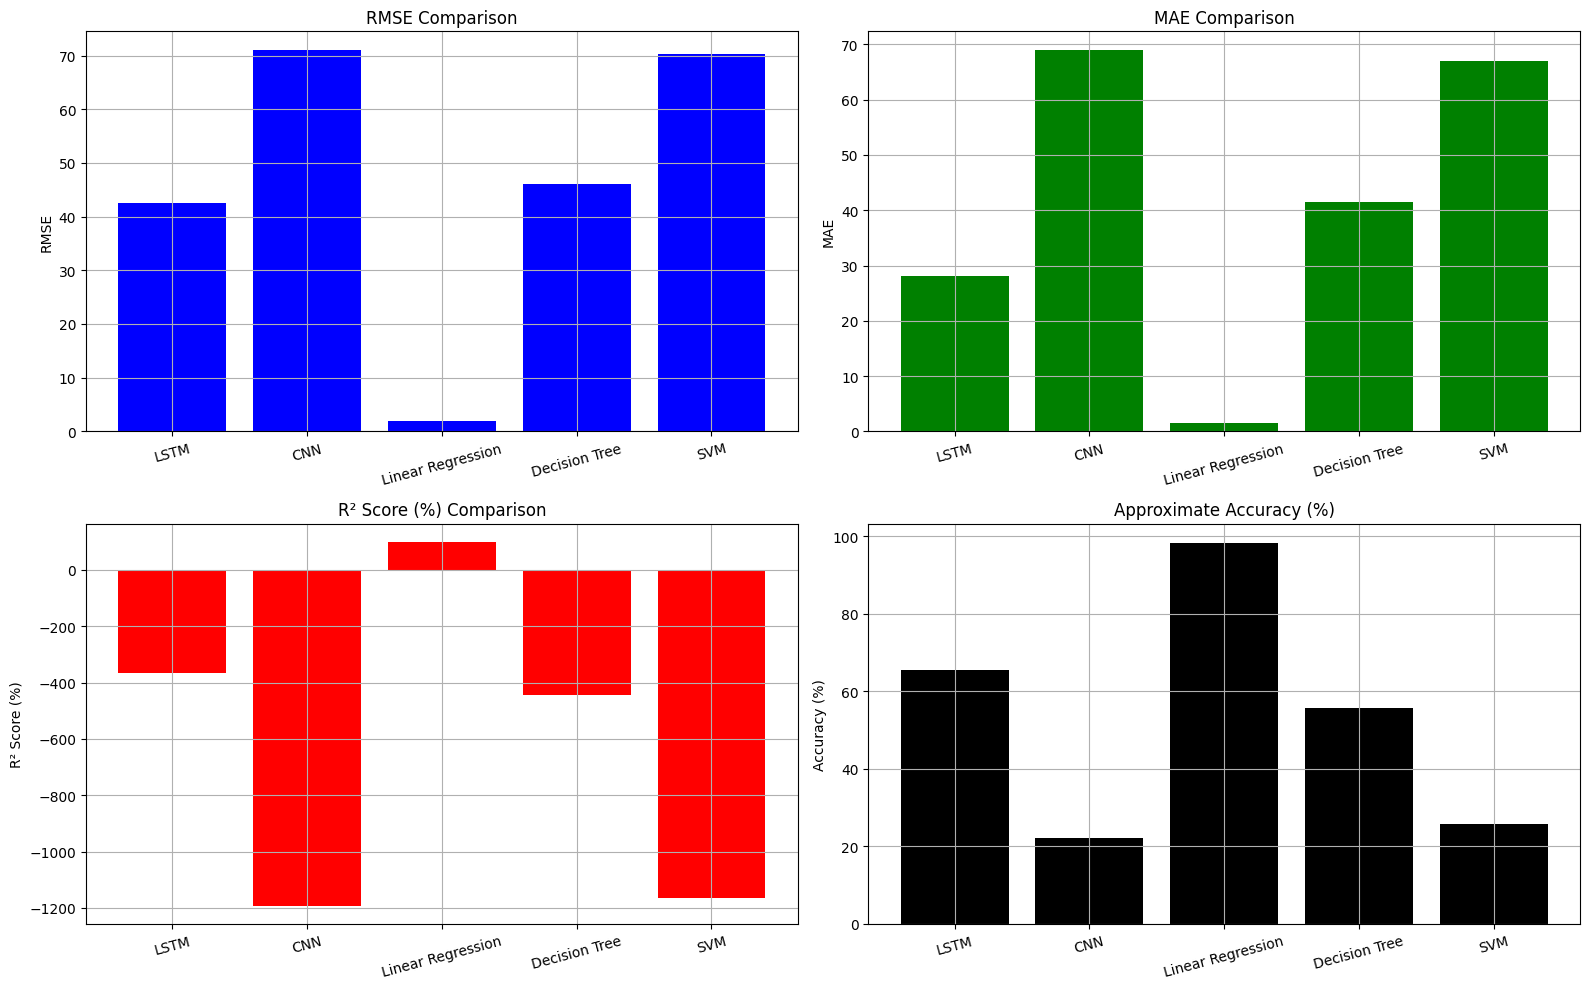

In [ ]:
x = np.arange(len(model_names))
width = 0.25

plt.figure(figsize=(16,10))

# RMSE
plt.subplot(2, 2, 1)
plt.bar(model_names, rmse_values, color='blue')
plt.title("RMSE Comparison")
plt.ylabel("RMSE")
plt.xticks(rotation=15)
plt.grid(True)

# MAE
plt.subplot(2, 2, 2)
plt.bar(model_names, mae_values, color='green')
plt.title("MAE Comparison")
plt.ylabel("MAE")
plt.xticks(rotation=15)
plt.grid(True)

# R² Score
plt.subplot(2, 2, 3)
plt.bar(model_names, r2_scores, color='red')
plt.title("R² Score (%) Comparison")
plt.ylabel("R² Score (%)")
plt.xticks(rotation=15)
plt.grid(True)

# Approx Accuracy
plt.subplot(2, 2, 4)
plt.bar(model_names, accuracy_scores, color='black')
plt.title("Approximate Accuracy (%)")
plt.ylabel("Accuracy (%)")
plt.xticks(rotation=15)
plt.grid(True)

plt.tight_layout()
plt.show()

In [ ]:
last_100_days = final_df[-100:]

last_100_days_scaled = scaler.transform(last_100_days)

last_100_days_scaled = np.reshape(last_100_days_scaled, (1, 100, 5))

# Predict the next day's closing price (in scaled form)
next_day_scaled = model.predict(last_100_days_scaled)


scaler_factor = 1 / scaler.scale_[3]
next_day_price = next_day_scaled * scaler_factor + scaler.min_[3]

print(f"\n📈 Predicted Next Day Closing Price: ${next_day_price[0][0]:.2f}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step

📈 Predicted Next Day Closing Price: $-106.91
